<div style="font-size:xx-large;font-family:sans-serif;font-weight:bold;line-height:normal">情報工学実験3 画像変換
<br>第１回：Python 言語の基礎から濃淡変換まで(2/2)</div>
<hr>

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#濃淡変換" data-toc-modified-id="濃淡変換-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>濃淡変換</a></span><ul class="toc-item"><li><span><a href="#ネガポジ反転" data-toc-modified-id="ネガポジ反転-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ネガポジ反転</a></span></li><li><span><a href="#二値化" data-toc-modified-id="二値化-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>二値化</a></span></li><li><span><a href="#ポスタリゼーション" data-toc-modified-id="ポスタリゼーション-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>ポスタリゼーション</a></span></li><li><span><a href="#ソラリゼーション" data-toc-modified-id="ソラリゼーション-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>ソラリゼーション</a></span></li><li><span><a href="#ガンマ補正" data-toc-modified-id="ガンマ補正-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>ガンマ補正</a></span></li><li><span><a href="#カラー画像↔グレースケール画像" data-toc-modified-id="カラー画像↔グレースケール画像-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>カラー画像↔グレースケール画像</a></span></li><li><span><a href="#色調変換（セピア変換）" data-toc-modified-id="色調変換（セピア変換）-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>色調変換（セピア変換）</a></span><ul class="toc-item"><li><span><a href="#練習問題1" data-toc-modified-id="練習問題1-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>練習問題1</a></span></li></ul></li><li><span><a href="#課題2" data-toc-modified-id="課題2-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>課題2</a></span></li><li><span><a href="#課題3" data-toc-modified-id="課題3-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>課題3</a></span></li><li><span><a href="#課題4(optional)" data-toc-modified-id="課題4(optional)-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>課題4(optional)</a></span></li></ul></li></ul></div>

# 濃淡変換
**濃淡変換**は
$$
f'(i, j) = g(f(i, j))
$$
によって定義される変換である．ここで，$f(i, j)$は入力画像の各画素の濃淡値，$f'(i, j)$は出力画像の濃淡値，関数$g(x)$は入力と出力の濃淡値を対応づける関数であり，**階調変換関数**(gray-level transformation function)とよばれる．また，階調変換関数をグラフで表したものを**トーンカーブ**(tone curve)とよぶ．

濃淡変換の入力画像，トーンカーブ，出力画像を描画する関数`show_transform()`を定義しておく．

In [1]:
import numpy as np
from skimage.io import imread, imsave
from skimage.color import rgb2gray, gray2rgb
import matplotlib.pyplot as plt
%matplotlib inline

def show_transform(im1, im2, h):
    """ 濃淡変換の入力画像，トーンカーブ，出力画像を描画
        im1 : 入力画像
        im2 : 出力画像
        h   : 階調変換関数
    """
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(im1.astype(np.uint8), cmap="gray")
    
    plt.subplot(1, 3, 2)
    I = np.arange(0, 255)
    plt.xlim(0, 255); plt.ylim(0, 255); plt.gca().set_aspect(1.0)
    try:
        y = h(I)
        plt.plot(I, y)
    except:
        x = np.vstack([I, I, I])
        y = h(x.T)
        plt.plot(I, y[0,:,0], 'r', label='R')
        plt.plot(I, y[0,:,1], 'g', label='G')
        plt.plot(I, y[0,:,2], 'b', label='B')
        plt.legend()
   
    plt.subplot(1, 3, 3)
    plt.imshow(im2.astype(np.uint8), cmap="gray")
    
im = imread("data/himeji.jpg")
im_gray = (255 * rgb2gray(im)).astype(np.int)

濃淡変換の具体例として以下を定義してみよう．

1. ネガポジ反転
2. 二値化
3. ポスタリゼーション
4. ソラリゼーション
5. ガンマ変換（ガンマ補正）
6. 色変換（セピア変換）
7. ヒストグラム平滑化

## ネガポジ反転

入力画像の濃淡値が出力画像の濃淡値を次式で反転することで，ネガフィルムのような画像が得られる．
$$
g(I) = 255 - I
$$

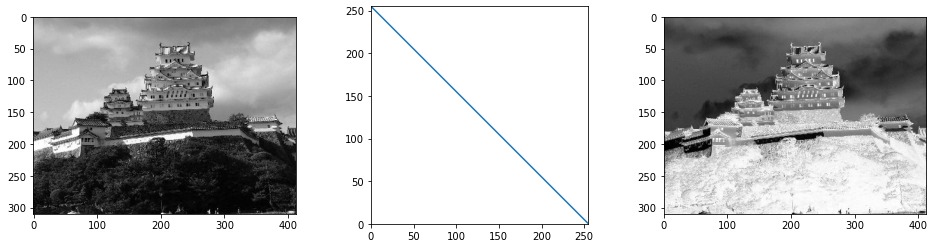

In [2]:
def negaposi_function(x):
    return 255 - x
im2 = negaposi_function(im_gray)
show_transform(im_gray, im2, negaposi_function)

## 二値化

入力画像の画素値を0または255の2段階に制限する処理を二値化とよぶ．以下の例では，128未満の画素値を0に，128以上の画素値を255に変換する．

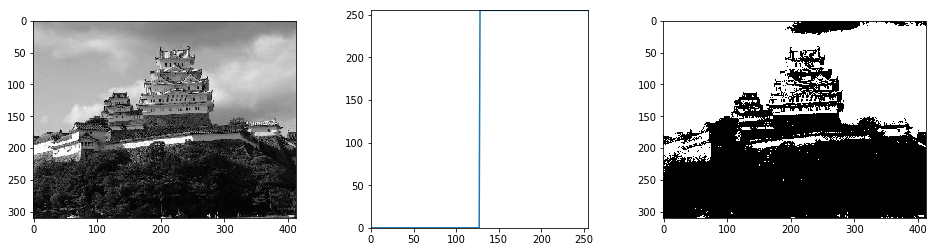

In [3]:
def binarize(I): return (I // 128) * 255
im2 = binarize(im_gray)
show_transform(im_gray, im2, binarize)

## ポスタリゼーション

出力画像の画素値を数段階の値に制限する濃淡変換である．以下の例では4段階に制限している．

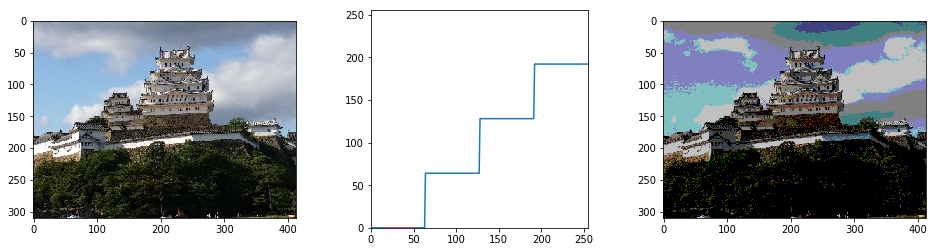

In [4]:
def posterization(I): return (I // 64) * 64
im2 = posterization(im)
show_transform(im, im2, posterization)

## ソラリゼーション

画像の濃淡の一部分を反転させることにより，ネガ画像とポジ画像が混ざり合ったような特殊な効果を出すことができる．このような効果は，もとは写真制作時の暗室テクニックであり，ソラリゼーションとよばれている．

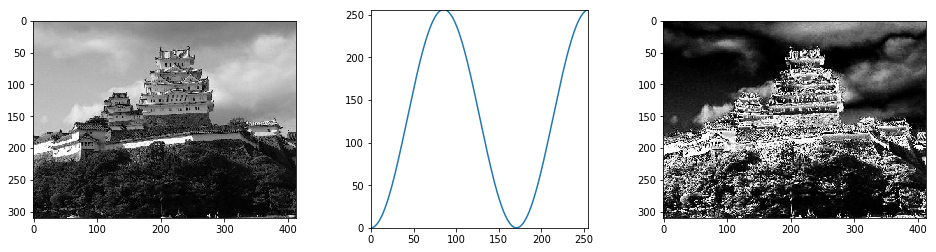

In [5]:
def solarize(I): return 128 - 128 * np.sin((I - 128)/128*1.5*np.pi)
im2 = solarize(im_gray)
show_transform(im_gray, im2, solarize)

ソラリゼーションは，区分線形関数として表現される階調変換関数を使って実現することもできる．

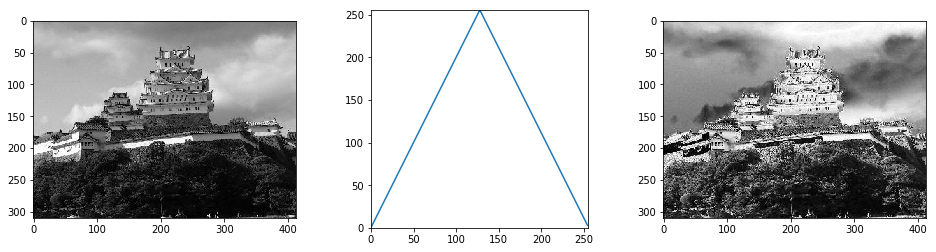

In [6]:
def piecewise_linear(I): 
    return np.piecewise(I, [I < 128, I >= 128], [lambda I: I * 2, lambda I: 511 - I * 2])
im2 = piecewise_linear(im_gray)
show_transform(im_gray, im2, piecewise_linear)

## ガンマ補正

冪乗型（べきじょう）のトーンカーブを用いた階調変換の例としてガンマ変換（ガンマ補正）が有名である．もとは，CRTディスプレイなどの画像出力装置の特性を補正するために用いられたものである．
$$
g(x) = 255 (\frac{x}{255})^{\frac{1}{\gamma}}
$$

$\gamma$の値によってトーンカーブの形状が変化し，$\gamma>1$のときは上に凸，$\gamma<1$の時は下に凸のトーンカーブとなる．

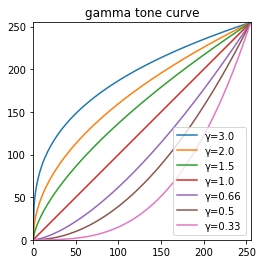

In [7]:
def gamma(gam, I): return 255 * (I / 255) ** (1/gam)
def gamma03(I): return gamma(1/3, I)
def gamma3(I): return gamma(3, I)
for g in [3.0, 2.0, 1.5, 1.0, 0.66, 0.5, 0.33]:
    x = np.arange(0, 255, 1)
    y = 255 * (x / 255)**(1/g)
    plt.plot(x, y, label="γ={}".format(g))

plt.title("gamma tone curve")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.gca().set_aspect(1)
plt.legend()

以下の例では，明るい領域（空の部分）の微妙な濃淡値の変化を強調し，コントラストを上げる効果がある．

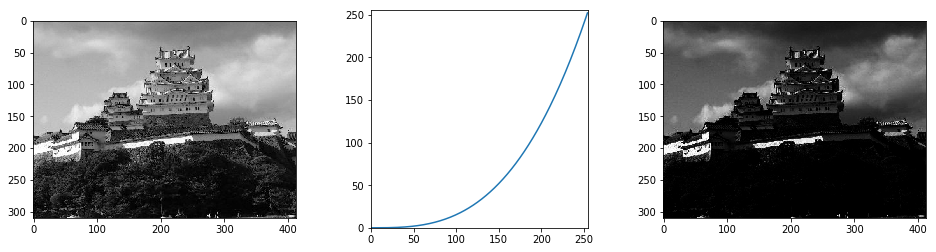

In [8]:
im2 = gamma03(im_gray)
show_transform(im_gray, im2, gamma03)

以下の例では，暗い領域（樹木の部分）の濃淡値の変化を強調し，コントラストを上げる効果がある．

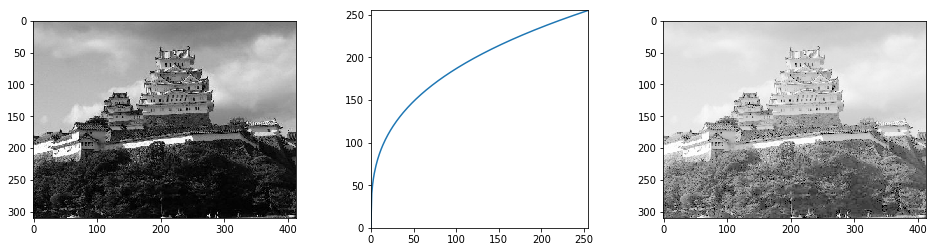

In [9]:
im2 = gamma3(im_gray)
show_transform(im_gray, im2, gamma3)

## カラー画像↔グレースケール画像

カラー画像$(R,G,B)$からグレースケール画像$Y$への変換式は以下のようになる．
$$
Y = 0.299 R + 0.587 G + 0.114 B
$$

グレースケール画像$Y$をカラー画像$(R,G,B)$に変換する場合は単純に$R=G=B=Y$とすればよい．

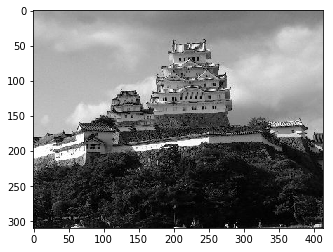

In [10]:
im2 = np.dot(im, np.array([0.299, 0.587, 0.114]))
plt.imshow(im2, cmap="gray")

## 色調変換（セピア変換）

白黒写真をセピア色の古写真の色合いに変化させる画像フィルタを設計する場合，白色
をセピア色に変換すれば良いので，例えば，グレースケール画像を一旦，RGBカラー画像に変換し，
RGB の各色の画素値をそれぞれ1.0 倍，0.7倍，0.4 倍する．

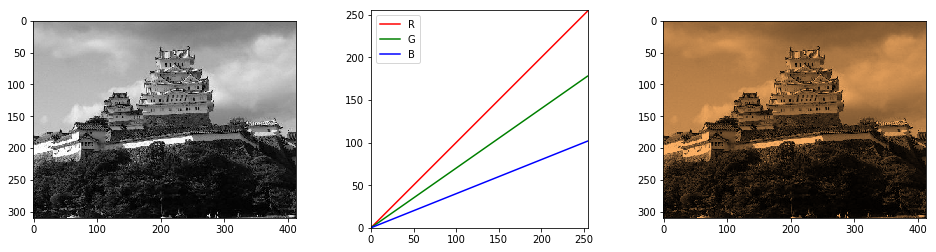

In [11]:
def sepia(x):
    return x * np.array([[[1.0, 0.7, 0.4]]])
    #return  x * np.array([[[240/255, 200/255, 145/222]]])
im2 = sepia(gray2rgb(im_gray))
show_transform(im_gray, im2, sepia)

> ### 練習問題1
> しきい値 $T ( 0 < T < 255)$を指定して，二値化を行う関数`binarize2(T, x)`を定義しなさい．
> T = 50 とした時の結果は以下のようになる．
> <img src="img/binarize2.png"/>

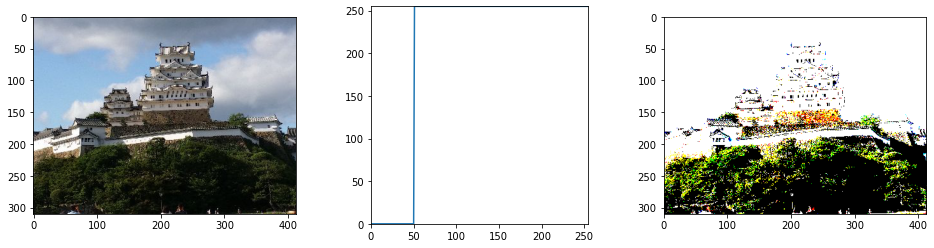

In [9]:
def binarize2(T, x):
    # ↓ここにコードを追加
    return (x>T)* 255

T = 50
im2 = binarize2(T, im)
show_transform(im, im2, lambda x: binarize2(T, x))

## 課題2

自分自身で撮影した画像$f$に対して，以下を実行しなさい．
  1. ガンマ値$\gamma$を変化させながら，画像$f$にガンマ補正を施した結果を求める．
  2. ガンマ補正によるコントラスト向上の効果を確認しなさい．主観的で良いので，見た目が良くなるガンマ値を選択し，どの部分にガンマ補正の効果が現れているか説明しなさい．
  3. レポートには**2つ以上**のガンマ値に対して補正結果を図示し，その図を本文中で引用しながら考察すること．

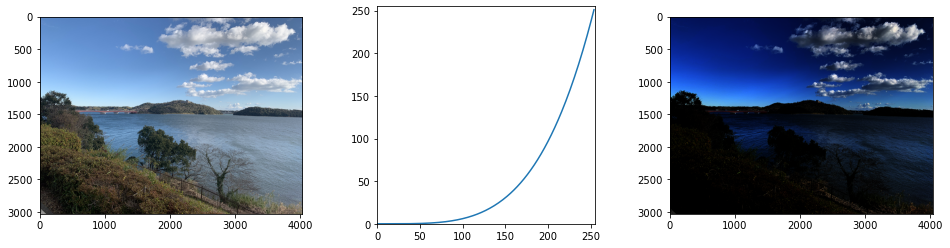

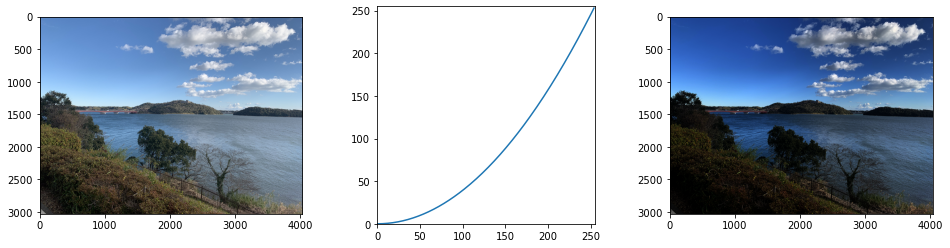

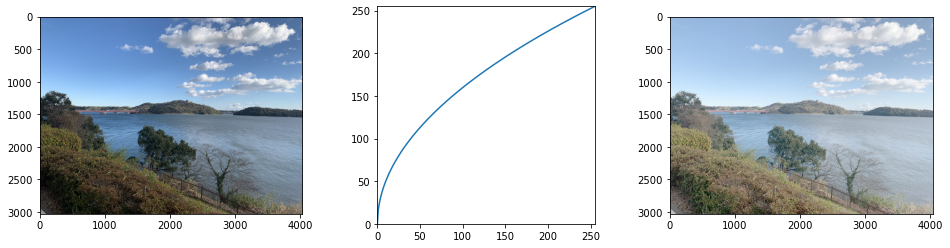

In [13]:
#4619055
import numpy as np
from skimage.io import imread, imsave
from skimage.color import rgb2gray, gray2rgb
import matplotlib.pyplot as plt
%matplotlib inline

def show_transform(im1, im2, h):
    """ 濃淡変換の入力画像，トーンカーブ，出力画像を描画
        im1 : 入力画像
        im2 : 出力画像
        h   : 階調変換関数
    """
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(im1.astype(np.uint8), cmap="gray")
    
    plt.subplot(1, 3, 2)
    I = np.arange(0, 255)
    plt.xlim(0, 255); plt.ylim(0, 255); plt.gca().set_aspect(1.0)
    try:
        y = h(I)
        plt.plot(I, y)
    except:
        x = np.vstack([I, I, I])
        y = h(x.T)
        plt.plot(I, y[0,:,0], 'r', label='R')
        plt.plot(I, y[0,:,1], 'g', label='G')
        plt.plot(I, y[0,:,2], 'b', label='B')
        plt.legend()
   
    plt.subplot(1, 3, 3)
    plt.imshow(im2.astype(np.uint8), cmap="gray")
    
def gamma(gam, I): return 255 * (I / 255) ** (1/gam)
def gamma14(I): return gamma(1/4, I)
def gamma12(I): return gamma(1/2, I)
def gamma2(I): return gamma(2, I)

f = imread("data/kadai2.jpg")

show_transform(f, gamma14(f), gamma14)
show_transform(f, gamma12(f), gamma12)
show_transform(f, gamma2(f), gamma2)

## 課題3
指定した2枚の画像$f$, $f'$について以下の課題に取り組みなさい．ここで，画像$f'$は未知の階調変換関数$g(x)$による濃淡変換によって生成される画像，すなわち，$f'(i, j)=g(f(i, j))$であるとする．
1. 画像$f$, $f'$を，それぞれ画像ファイル"exercise/himeji_ex3.jpg", "exercise/himeji_ex3_G?.png"から読み込み，画像の幅・高さを求めなさい．("G?"にはグループ1であればG1が入る．）
2. 画像$f(i, j)$, $f'(i, j)$の対応する画素値の散布図を作成しなさい．下図の散布図は例であり，出力される図は課題によって異なる．多次元配列を1次元に変換する`flatten()`を使用するとよい．
<img src="img/ex2_scatter_plot.png" width=200px/>
3. 階調変換関数$g(x)$を推測し，数式として表しなさい．
4. 3.で推測した階調変換関数$g(x)$によって画像$f$から画像$f'$が生成されること確かめなさい．具体的には画像$f'(i, j)$と階調変換関数によって画像$f$から生成された画像$g(f(i, j))$の平均二乗誤差(MSE: Mean Squared Error)
$$\mbox{MSE}=\frac{1}{WH}\sum_{j=0}^{H-1} \sum_{i=0}^{W-1} \left(f'(i, j) - g(f(i, j))\right)^2$$
が$1$以下であることを確認すればよい．ただし，画素値$f'(i, j)$, $f(i, j)$の最大値，最小値は255, 0とする．
また，カラー画像の場合のMSEは以下の式で表される．
$$\mbox{MSE}=\frac{1}{|C|WH}\sum_{c\in C}\sum_{j=0}^{H-1} \sum_{i=0}^{W-1} \left(f'(i, j, c) - g(f(i, j, c))\right)^2$$
ここで，$C=\{R,G,B\}$はチャンネルを表す

5. なぜ結果が完全に一致しないか，すなわち$\mbox{MSE}\neq0$となる理由を考察しなさい．

In [ ]:
#4619055



## 課題4(optional)
階調変換関数を各自で設計し，面白い画像変換を創作しなさい．創作した画像変換に名前をつけて，変換例を示しながらその機能を説明しなさい．

In [11]:
#4619055

